In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#!pip install xgboost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [64]:
df1 = df

In [55]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


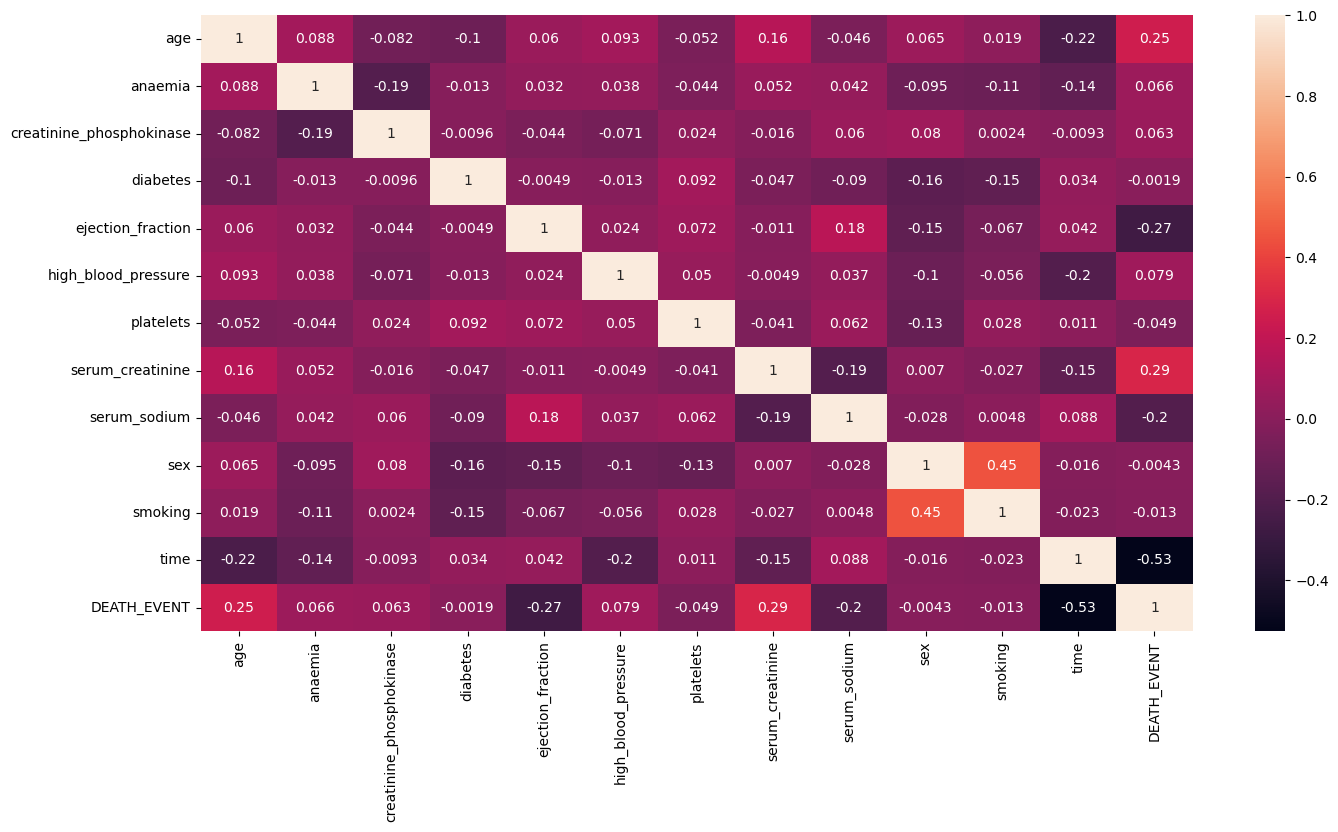

In [5]:
cor = df.corr()
plt.figure(figsize = (16,8))
sns.heatmap( cor, annot = True)
plt.show()

- Correaltion with dependent variable(Death)
- age and serum_creatinine are positively correalted with Death 
- ejection_fraction and time(follow-up period) are negatively correlated with Death

In [56]:
# check for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [46]:
df.isnull().values.any()

False

### Changing column values(for analysis)

In [57]:

df['anaemia'] = np.where(df['anaemia'] < 1 , "no", "yes")
df['diabetes'] = np.where(df['diabetes'] < 1 , "no", "yes")
df['high_blood_pressure'] = np.where(df['high_blood_pressure'] < 1 , "no", "yes")
df['sex'] = np.where(df['sex'] < 1 ,"female","male")
df['smoking'] = np.where(df['smoking'] < 1 , "no", "yes")
df['DEATH_EVENT'] = np.where(df['DEATH_EVENT']  < 1, "no", "yes")

In [58]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,no,582,no,20,yes,265000.00,1.9,130,male,no,4,yes
1,55.0,no,7861,no,38,no,263358.03,1.1,136,male,no,6,yes
2,65.0,no,146,no,20,no,162000.00,1.3,129,male,yes,7,yes
3,50.0,yes,111,no,20,no,210000.00,1.9,137,male,no,7,yes
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,female,no,8,yes


## Exploratory Data Analysis

In [40]:
df['smoking'].value_counts()

no     203
yes     96
Name: smoking, dtype: int64

[Text(0.5, 1.0, 'Number of anaemia cases(yes - 1,no - 0)')]

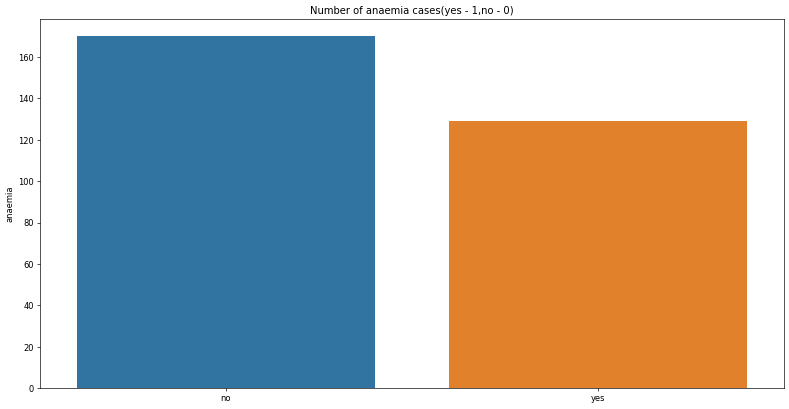

In [10]:
plt.figure(figsize = (16,8),dpi = 60)
sns.barplot(x = df['anaemia'].value_counts().index,
            y = df['anaemia'].value_counts(),
            data = df).set(title = "Number of anaemia cases(yes - 1,no - 0)")


[Text(0.5, 1.0, 'Number of death cases by sex')]

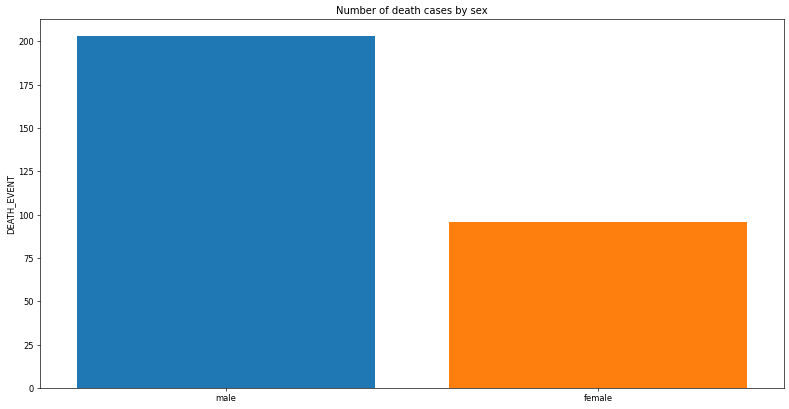

In [11]:
plt.figure(figsize = (16,8), dpi = 60)

sns.barplot(x = df['sex'].value_counts().index,
            y = df['DEATH_EVENT'].value_counts(),
            data = df, saturation = 1).set(title = "Number of death cases by sex")

**Risk of Death cases of males is twice to that of females**

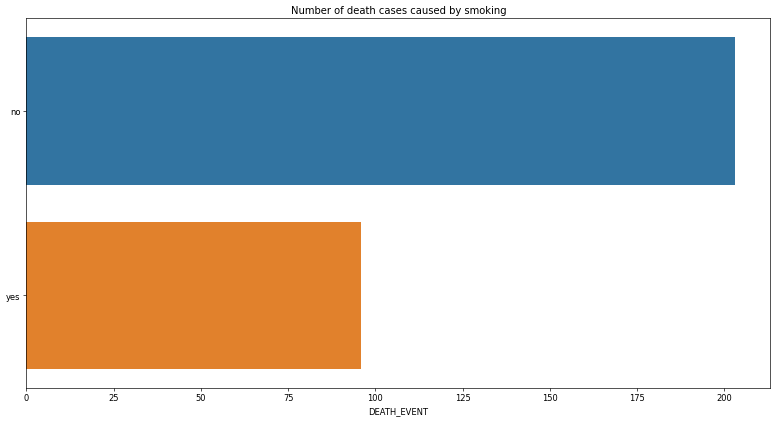

In [12]:
plt.figure(figsize = (16,8), dpi = 60)

sns.barplot(y = df['smoking'].value_counts().index,
            x = df['DEATH_EVENT'].value_counts(),
            data = df, orient = 'h').set(title = "Number of death cases caused by smoking");

**Mortality rate of non-smokers is higher than smokers,which does not happen under normal circumstances.Hence there may be data inconsistency.**

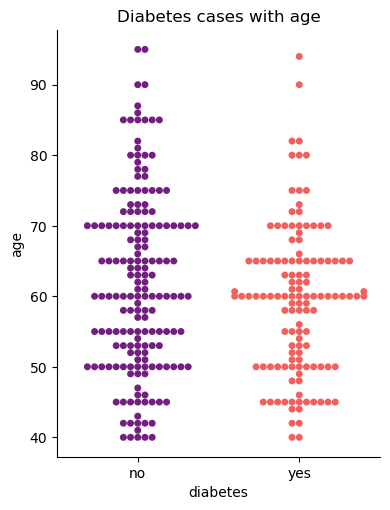

In [13]:
sns.catplot(x = "diabetes",
            y = 'age',
            kind = 'swarm',
            data =df, aspect = 0.8,palette = 'magma',
            margin_titles = True).set(title = 'Diabetes cases with age')

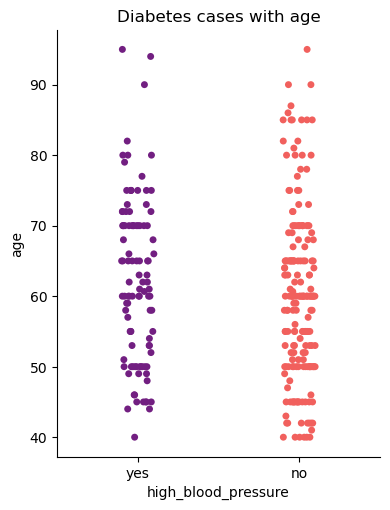

In [14]:
sns.catplot(x = "high_blood_pressure",
            y = 'age',
            kind = 'strip',
            data =df, aspect = 0.8,palette = 'magma',
            margin_titles = True).set(title = 'Blood Pressure cases with age')

Text(0.5, 1.0, 'anaemia and creatinine_phosphokinase')

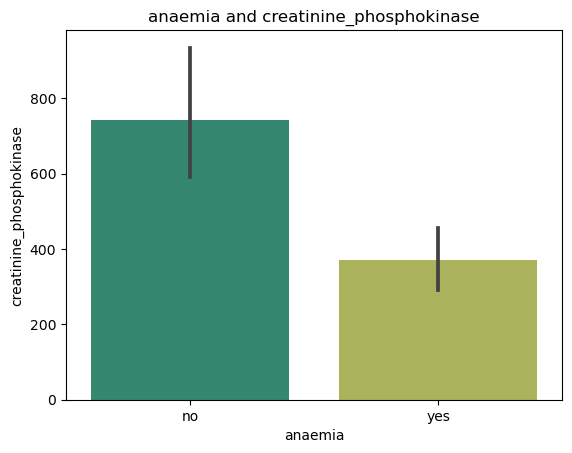

In [15]:

sns.barplot(x = "anaemia",
            y = "creatinine_phosphokinase",
            data = df, palette = "gist_earth",
            saturation = 1).set_title("anaemia and creatinine_phosphokinase")

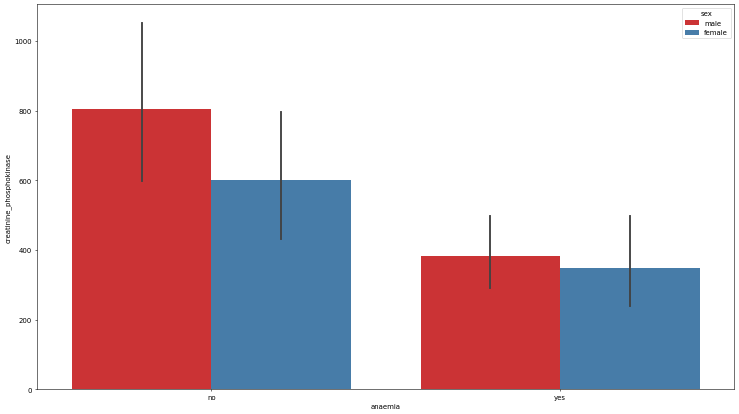

In [16]:
plt.figure(figsize = (18,10), dpi = 50)

sns.barplot(x = 'anaemia', y = 'creatinine_phosphokinase',hue = 'sex',
            data = df, palette = 'Set1');

**Relation between categorical and numerical features can be observed** 

## Distplot

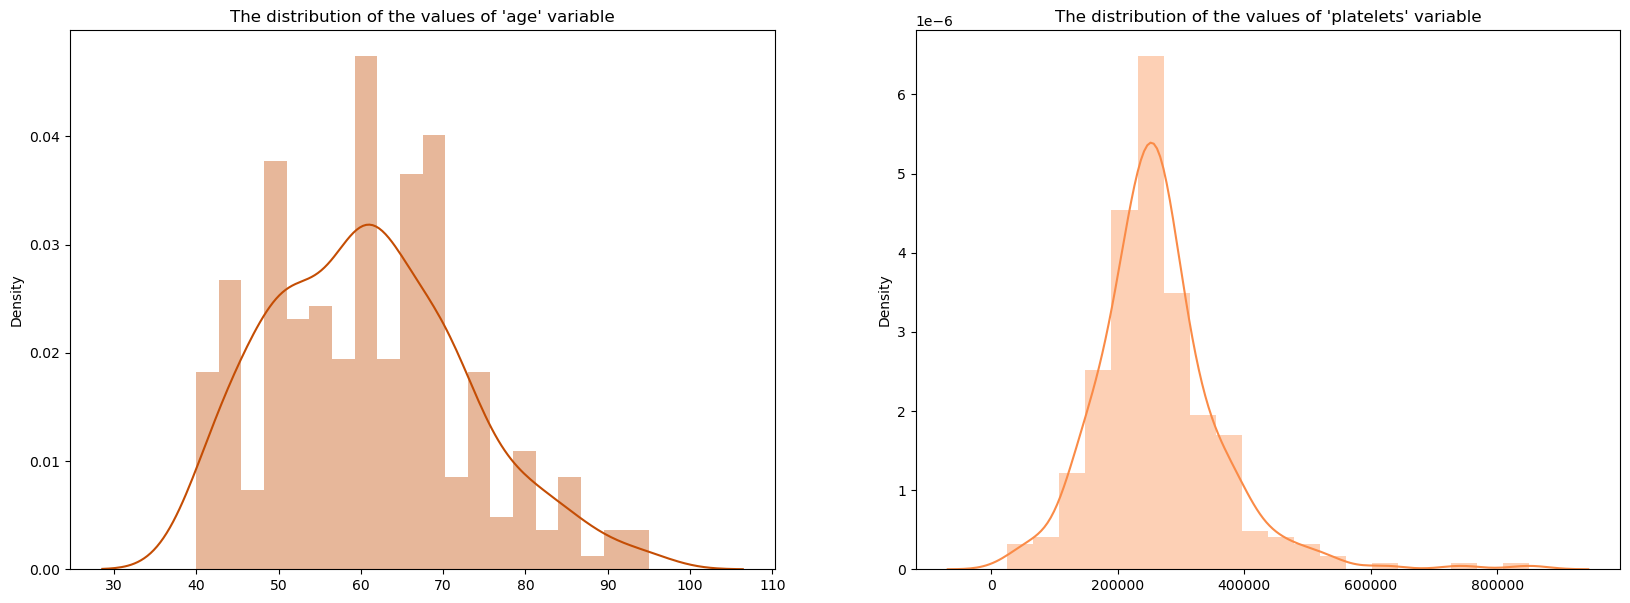

In [17]:
fig,axes = plt.subplots(1,2 , figsize = (20,7))

sns.distplot(ax = axes[0], x = df['age'],
             hist = True,
             bins = 20,
             kde = True,
             vertical = False, color = "#C44D04").set(title = "The distribution of the values of 'age' variable");
sns.distplot(ax = axes[1], x = df["platelets"],
             hist = True,
             bins = 20,
             kde = True,
             vertical = False, color = "#FA8B47").set(title = "The distribution of the values of 'platelets' variable");

**From the first graph, we can observe that the values of the "age" variable are mostly distributed as values of 50, 60 and 70. In addition, there are many peaks in the distribution graph of the "age" variable. This is an indicator that the values of the variable are not normally distributed. Looking at the second graph, we can observe that the values of the "platelets" variable are mainly distributed between 200000 and 400000. At the same time, the graph does not have many peaks, skewness and kurtosis are low. It can be said that the values of this variable are normally distributed.**

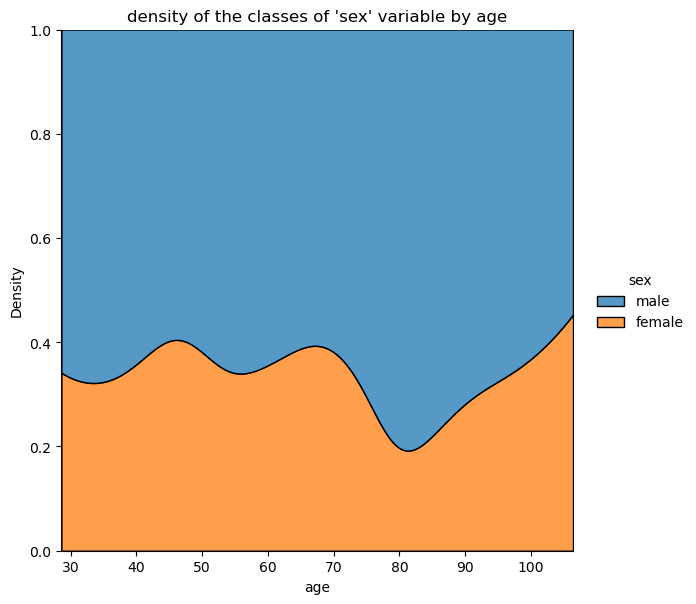

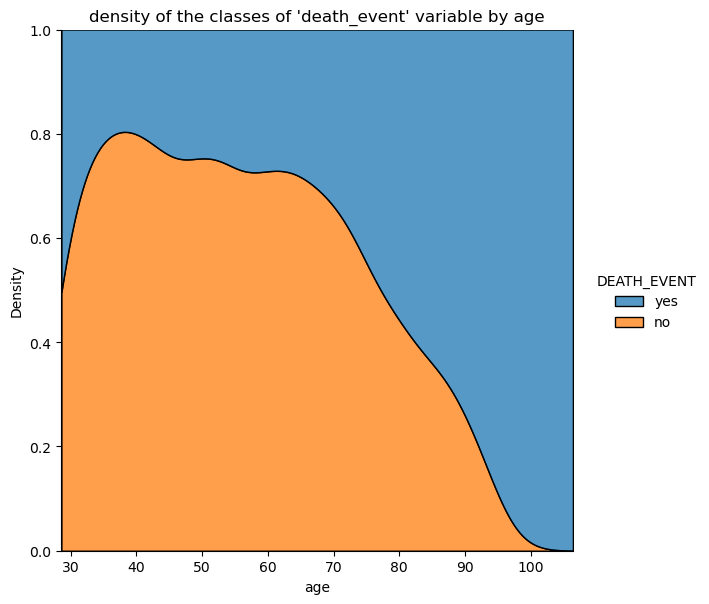

In [18]:
sns.displot(
    data = df,
    x = "age", hue = "sex",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    color = "#FE6203",
    ).set(title = "density of the classes of 'sex' variable by age");


sns.displot(
    data = df,
    x = "age", hue = "DEATH_EVENT",
    kind = 'kde', height = 6,
    multiple = 'fill',clip = (0,None)
    ).set(title = "density of the classes of 'death_event' variable by age");

**Boxplot**

[Text(0.5, 1.0, "relationship between 'sex' and 'platelets' variables")]

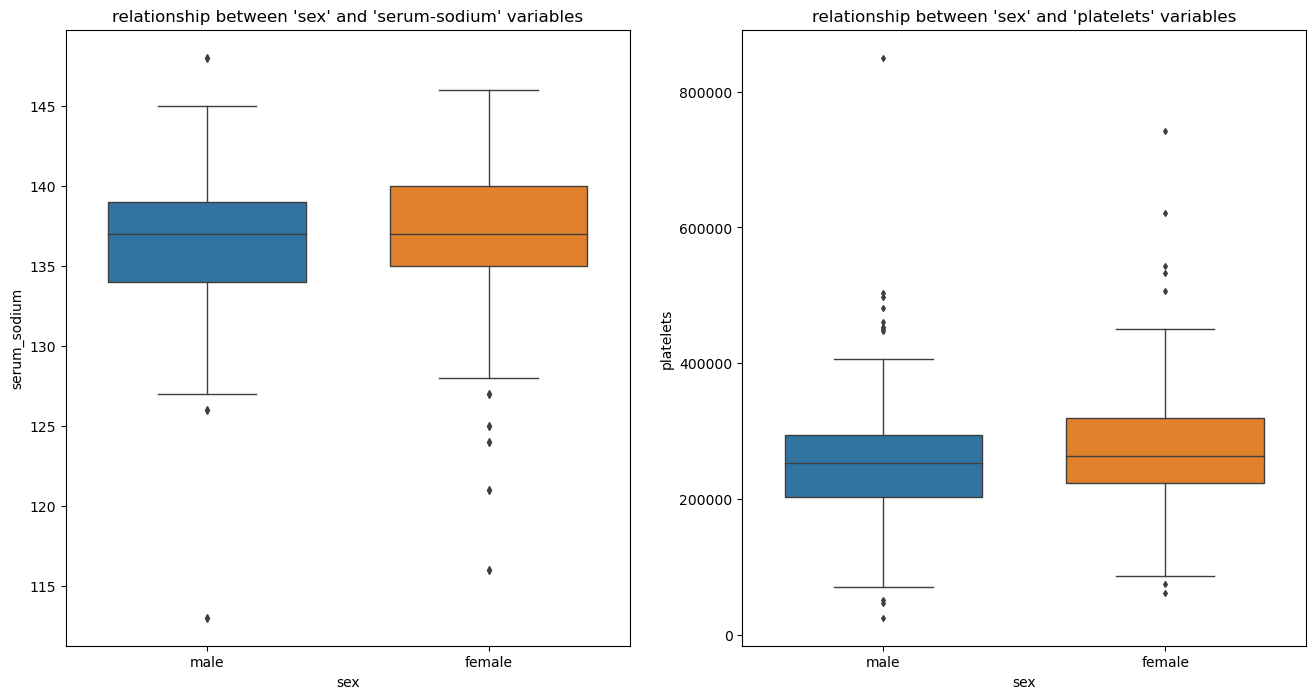

In [19]:
fig, axes = plt.subplots(1,2, figsize = (16,8))

sns.boxplot(ax = axes[0],x = 'sex', y = 'serum_sodium', data = df, width = 0.7,
             orient = "v", fliersize = 4, linewidth = 1);
axes[0].set(title = "relationship between 'sex' and 'serum-sodium' variables")

sns.boxplot(ax = axes[1], x = 'sex',y = 'platelets', data =df, width = 0.7,
             orient = "v", fliersize = 3, linewidth = 1);
axes[1].set(title = "relationship between 'sex' and 'platelets' variables")

**pairplot**

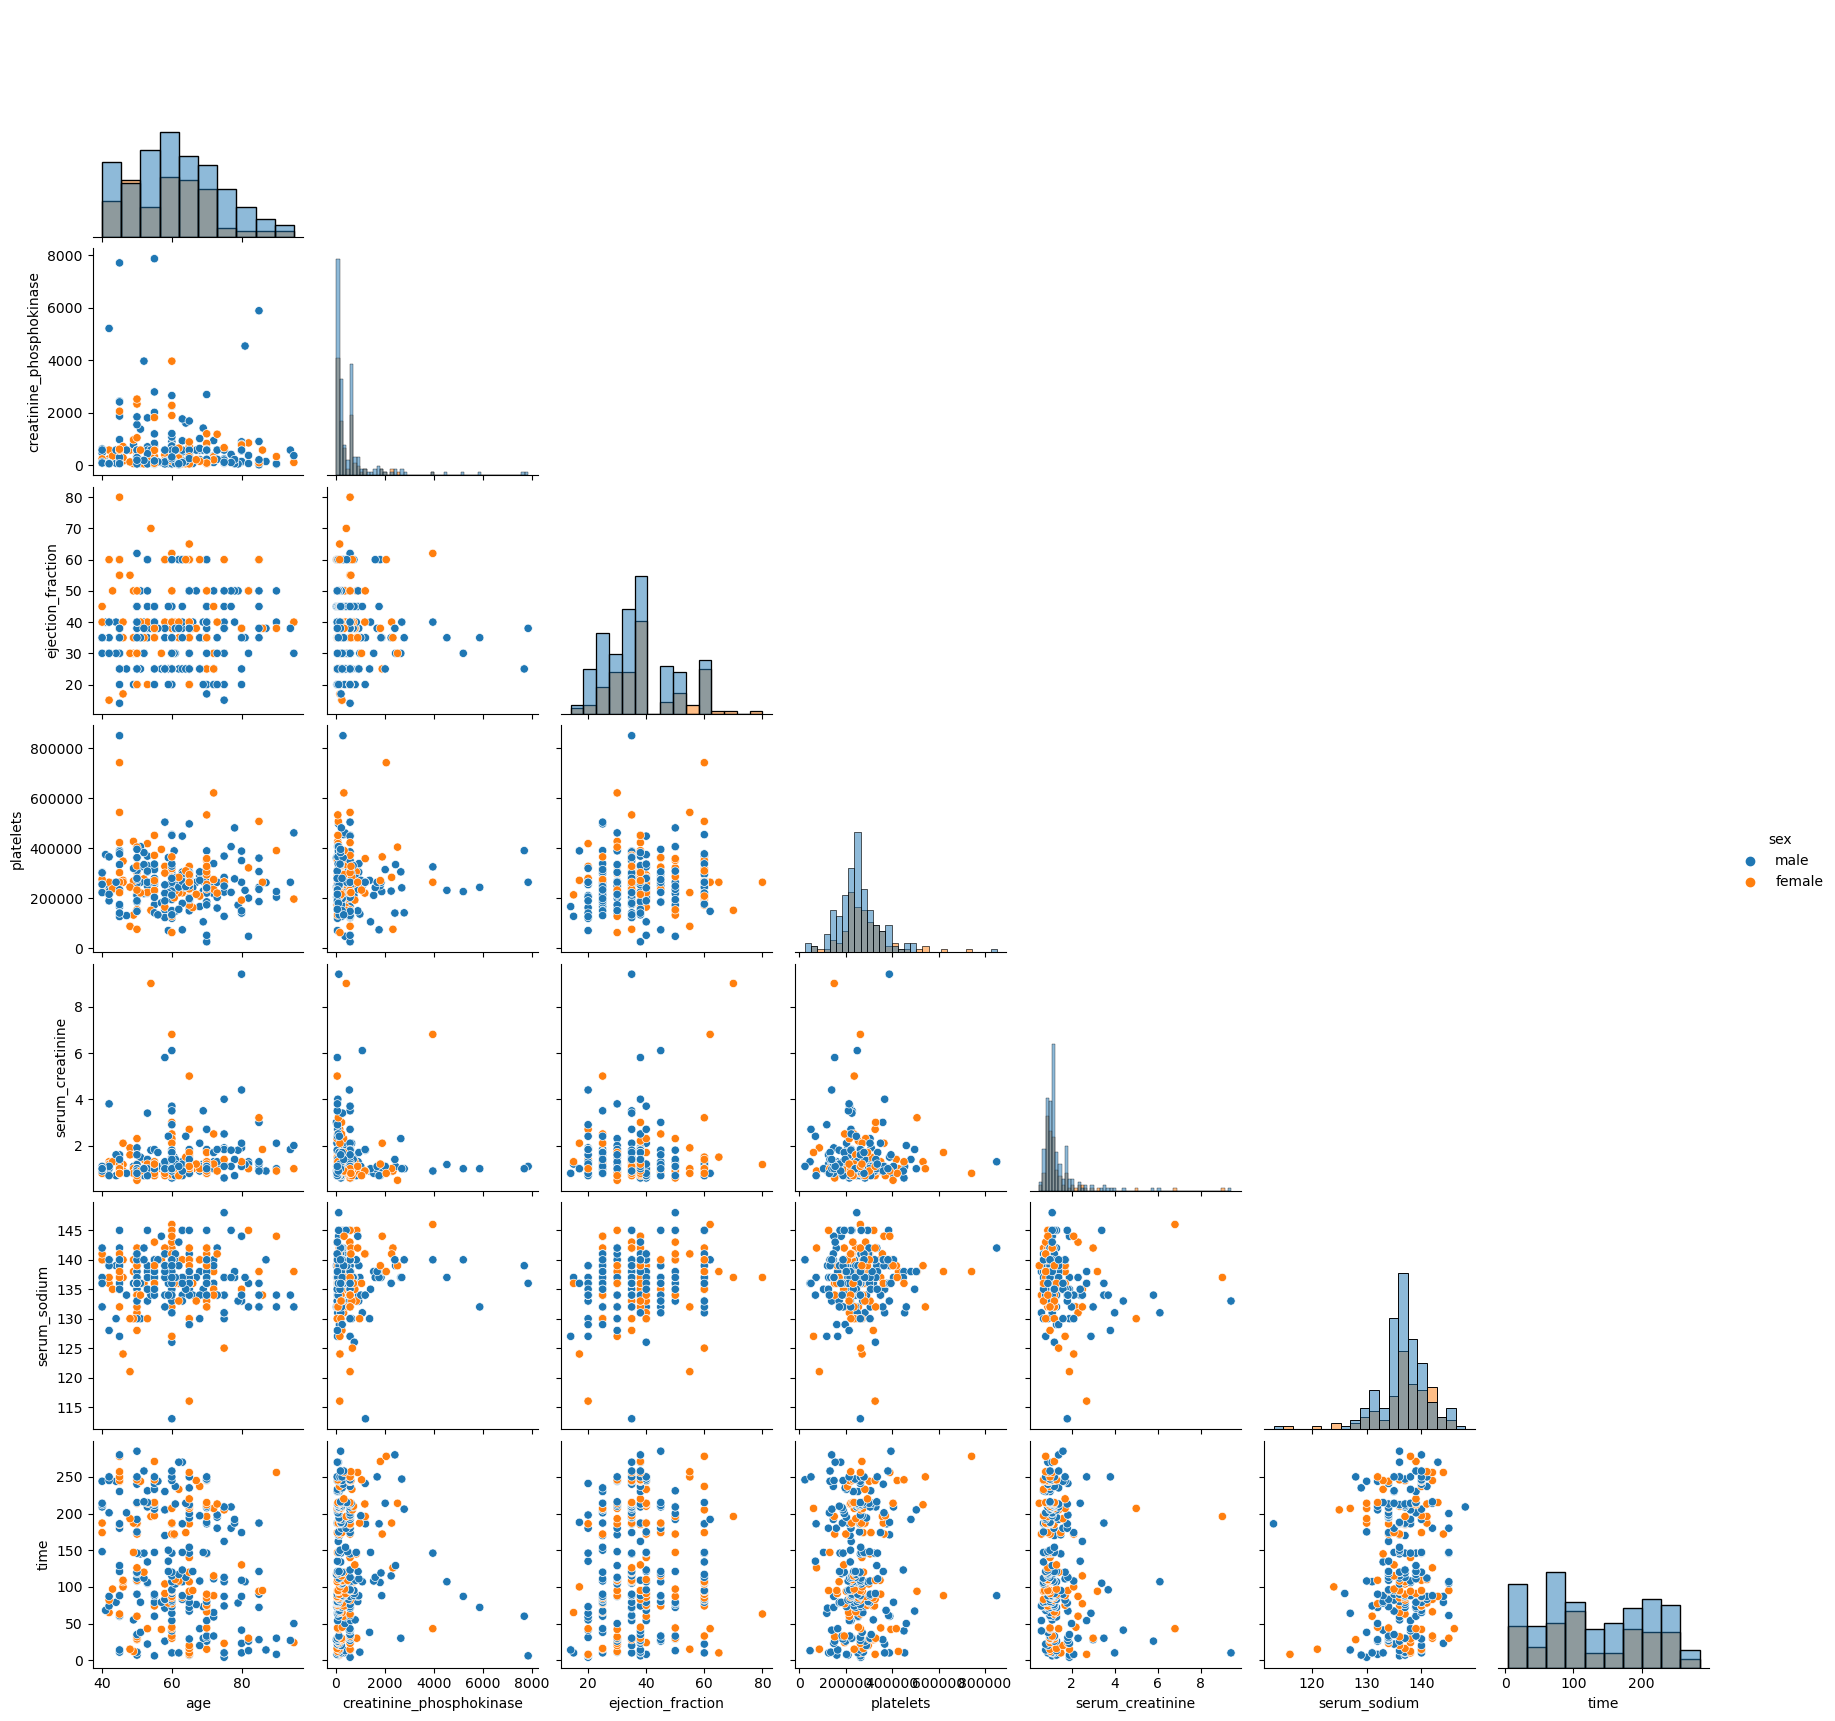

In [20]:
sns.pairplot(df, hue = 'sex',diag_kind = 'hist',  corner  = True)

**From the graph above, we can observe whether there is a correlation between the numerical variables, as well as the distribution of those variables**

**Scatterplot**

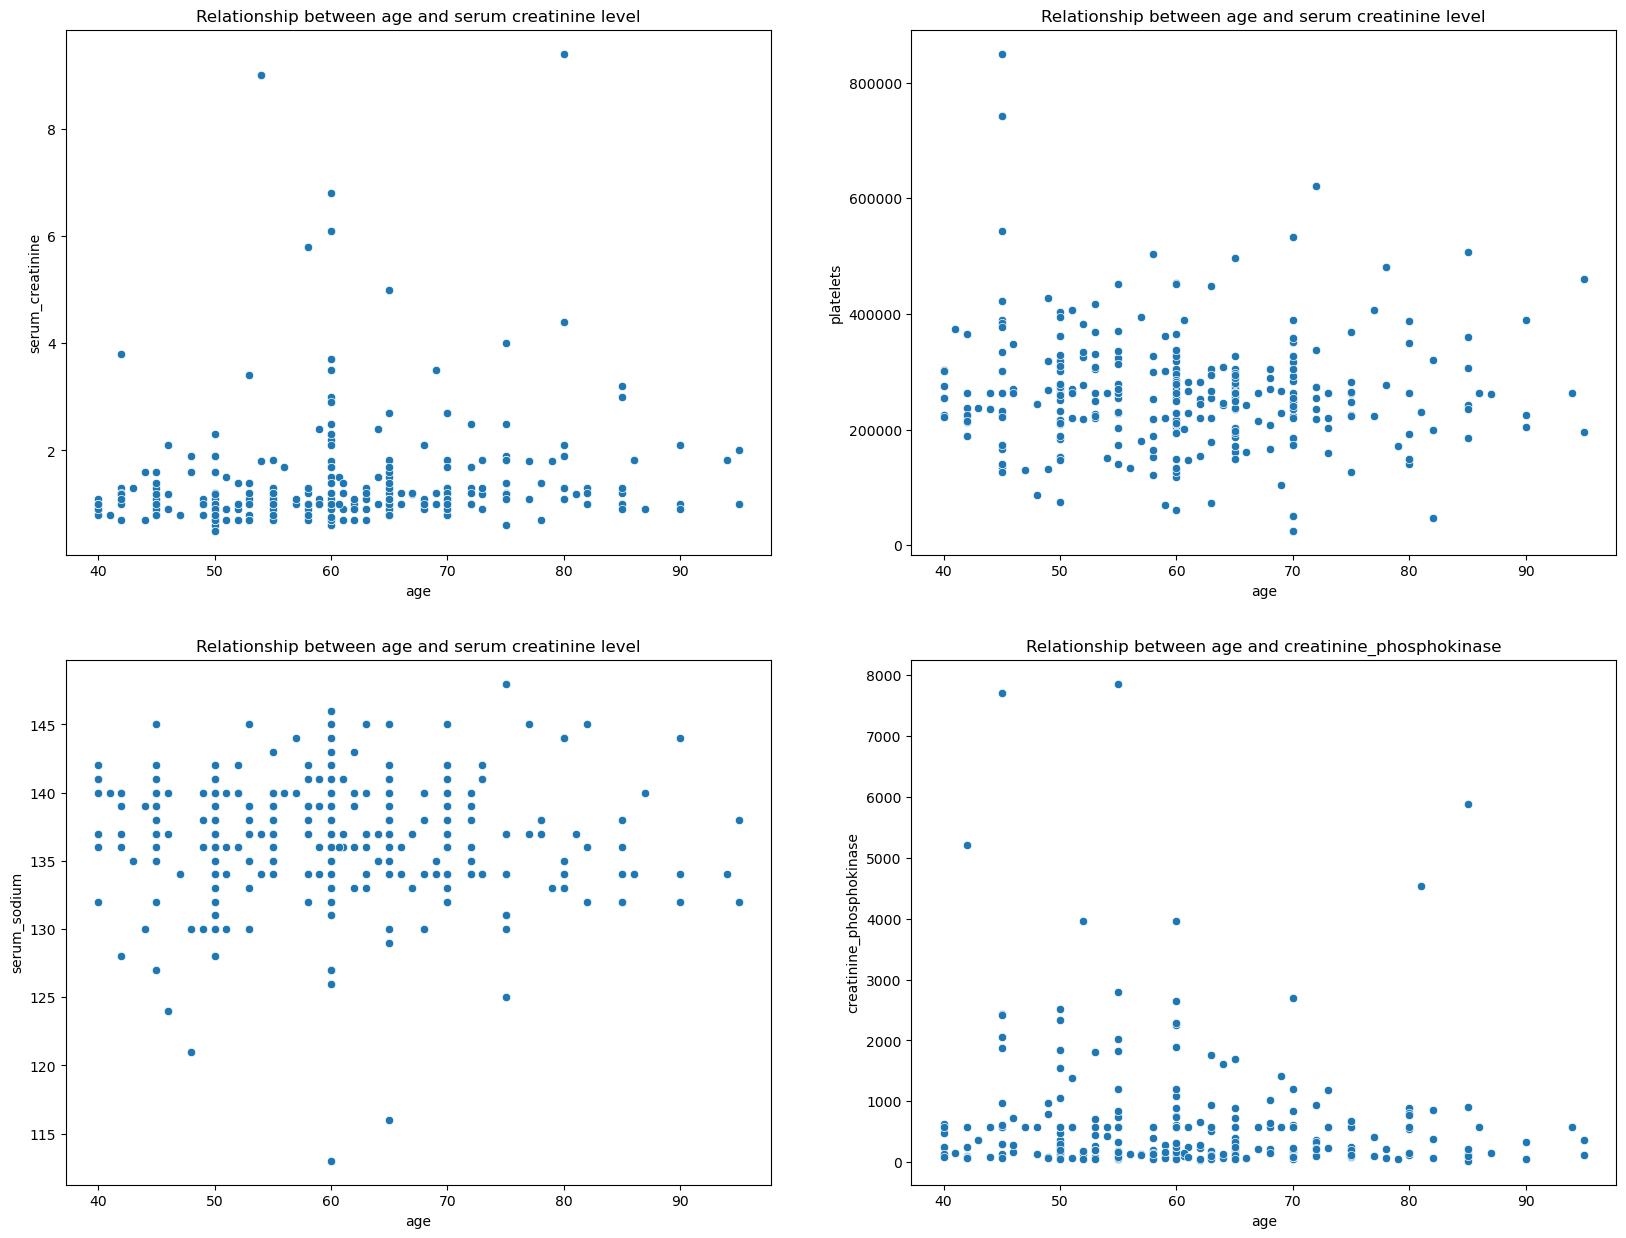

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = 'age',
                y = 'serum_creatinine', palette = 'Reds_r',
                data = df).set(title = "Relationship between age and serum creatinine level");

sns.scatterplot(ax = axes[1],
                x = 'age',
                y = 'platelets', palette = 'Reds_r',
                data = df).set(title = "Relationship between age and serum creatinine level");

sns.scatterplot(ax = axes[2],
                x = 'age',
                y = 'serum_sodium', palette = 'Reds_r',
                data = df).set(title = "Relationship between age and serum creatinine level");

sns.scatterplot(ax = axes[3],
                x = "age",
                y = "creatinine_phosphokinase",  palette = "Reds_r",
                data = df).set(title = 'Relationship between age and creatinine_phosphokinase');


**As it is seen there is no correlation between variables,the values are constant**

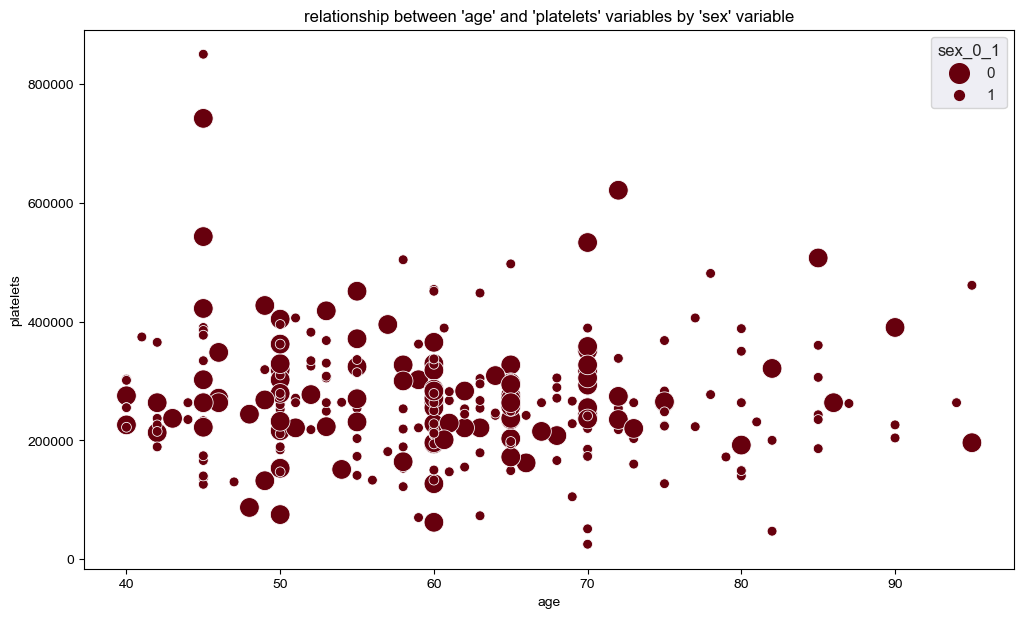

In [22]:
df["sex_0_1"] = np.where(df["sex"] == "male", 1, 0)

fig, axes = plt.subplots(figsize = (12, 7))

sns.set_theme(style = "darkgrid")

sns.scatterplot(data = df, x = "age", y = "platelets", hue = "sex_0_1",
    palette = "Reds_r", size = "sex_0_1", sizes = (50, 200), hue_norm = (2, 8),
    legend="auto").set(title = "relationship between 'age' and 'platelets' variables by 'sex' variable");

**pandas crosstab**

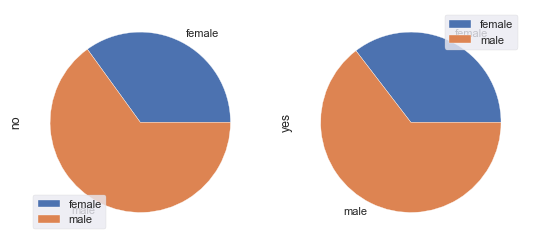

In [23]:
plt.style.use('seaborn-paper')
pd.crosstab(df['sex'], df['DEATH_EVENT'], normalize = True).plot(kind = 'pie', subplots = True, stacked = True);

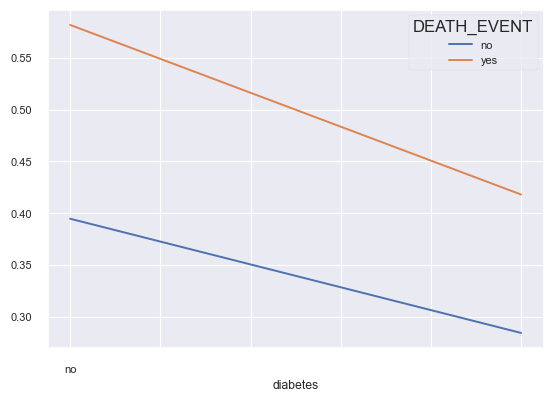

In [24]:
pd.crosstab(df['diabetes'], df['DEATH_EVENT'], normalize = True).plot(kind = "line", stacked = True);

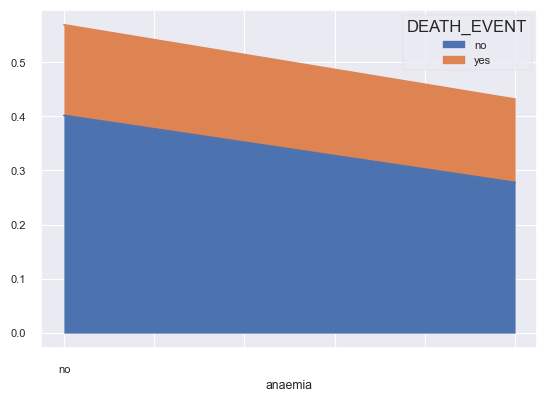

In [25]:
pd.crosstab(df['anaemia'], df['DEATH_EVENT'], normalize = True).plot(kind = "area", stacked = True);

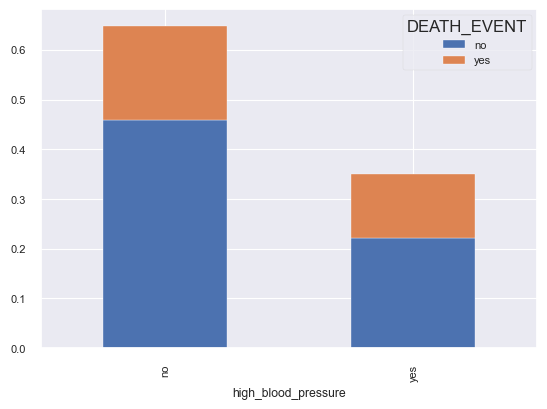

In [26]:
pd.crosstab(df['high_blood_pressure'], df['DEATH_EVENT'], normalize = True).plot(kind = "bar", stacked = True);

<AxesSubplot:ylabel='Density'>

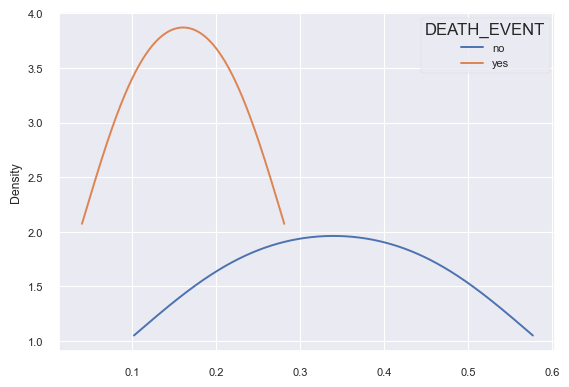

In [27]:
pd.crosstab(df['smoking'], df['DEATH_EVENT'],normalize = True).plot(kind = "kde", stacked = True)

In [65]:
x = df1.drop('DEATH_EVENT', axis = 1)

y = df1['DEATH_EVENT']

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)
                                                
                                   


**Standardize variables**

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [69]:
rf = RandomForestClassifier()

**Hyperparameter Tuning**

In [73]:
rf_params = {"max_depth" : [ 3,5,8,10],
             "max_features" : [3,5,8,10],
             "n_estimators" : [10,500, 200],
             "min_samples_split" : [2,5,10]}

rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10],
                         'max_features': [3, 5, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 200]})

Get best parameters

In [74]:
# No of models : 4x4x3x3 = 144 , folds =10 , total = 1440 model performances
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

**Build model with Best parameters**

In [76]:
rf_model = RandomForestClassifier(n_estimators = 500,
                                  max_depth = 8,
                                  max_features =3,
                                    min_samples_split = rf_cv_model.best_params_["min_samples_split"])

rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=3, min_samples_split=10,
                       n_estimators=500)

In [78]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9166666666666666

**classification report**

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.85      0.79      0.81        14

    accuracy                           0.92        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.92      0.92      0.92        60



**ROC - AUC Random Forests**

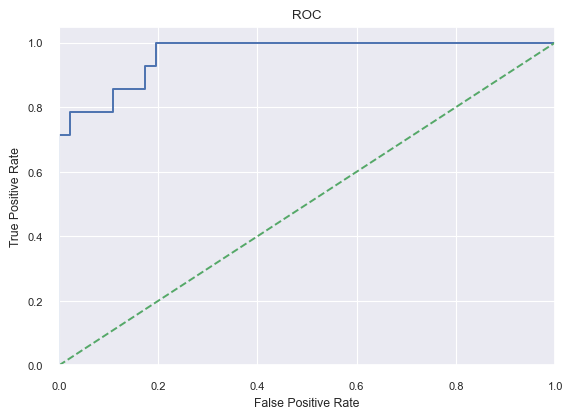

In [84]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

**Confusion Matrix Visualization**

[[44  2]
 [ 3 11]]


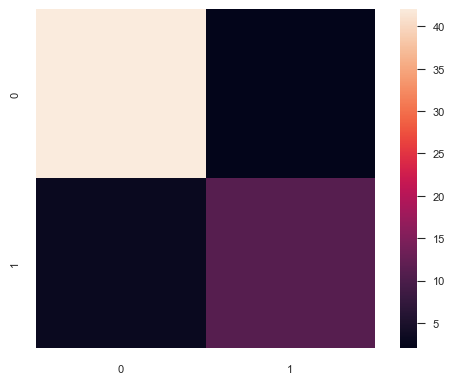

In [85]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, robust = True)
plt.show()

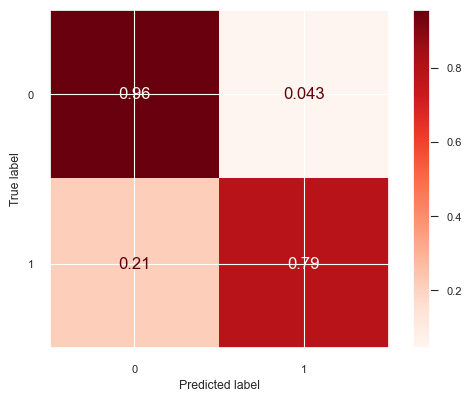

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model,
                      x_test,
                      y_test,
                      cmap = plt.cm.Reds,
                      normalize = 'true')

**Logistic Regression**

In [94]:
lr = LogisticRegression(solver = 'liblinear')
lr_model = lr.fit(x_train,y_train)
lr_model 

LogisticRegression(solver='liblinear')

In [95]:
y_pred = lr_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8833333333333333

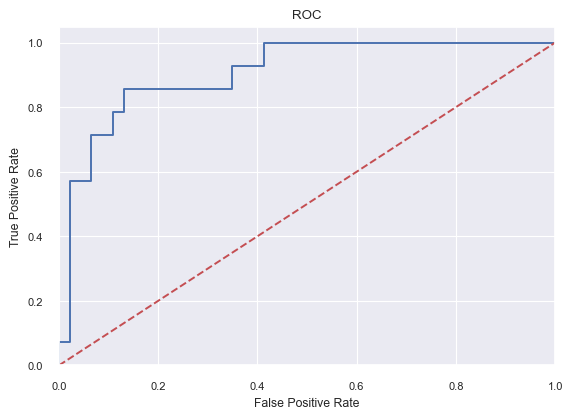

In [99]:
log_roc_auc = roc_auc_score(y_test, lr_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()